In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content

/content


In [7]:
!pwd

/content


In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ie9uTAtjhbrG4LkYfjPF")
project = rf.workspace("raaghavbhyana-eycjd").project("wind-turbine-inspection")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Wind-Turbine-Inspection-1 in yolov8:: 100%|██████████| 1478/1478 [00:00<00:00, 4564.50it/s]


In [13]:
%cd /content

/content


In [14]:
!pip install ultralytics

In [17]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Wind-Turbine-Inspection-1/data.yaml epochs=50  plots=True seed=42 save=True


Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Wind-Turbine-Inspection-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchs

In [21]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/Wind-Turbine-Inspection-1/test/images save=True


Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/30 /content/Wind-Turbine-Inspection-1/test/images/DJI_0088_JPG.rf.6ab06a7a9c489009617751390fdf07fd.jpg: 640x640 (no detections), 36.9ms
image 2/30 /content/Wind-Turbine-Inspection-1/test/images/DJI_0119_JPG.rf.d3a399b2d8550cd580a1a738730038d6.jpg: 640x640 2 errosions, 39.5ms
image 3/30 /content/Wind-Turbine-Inspection-1/test/images/DJI_0128_JPG.rf.374ceee47fc5bf79794873b965edf8e4.jpg: 640x640 1 cracks, 2 errosions, 29.5ms
image 4/30 /content/Wind-Turbine-Inspection-1/test/images/DJI_0132_JPG.rf.9f7dadb857e27248b9b2cf462eb27065.jpg: 640x640 1 cracks, 2 errosions, 29.5ms
image 5/30 /content/Wind-Turbine-Inspection-1/test/images/DJI_0164_JPG.rf.401301eb22d60e7f9f93a6f27f0810e7.jpg: 640x640 (no detections), 29.5ms
image 6/30 /content/Wind-Turbine-Inspection-1/test/images/DJI_0172_JPG.rf.54d838e937c8e82d4e0b75b0cb7e

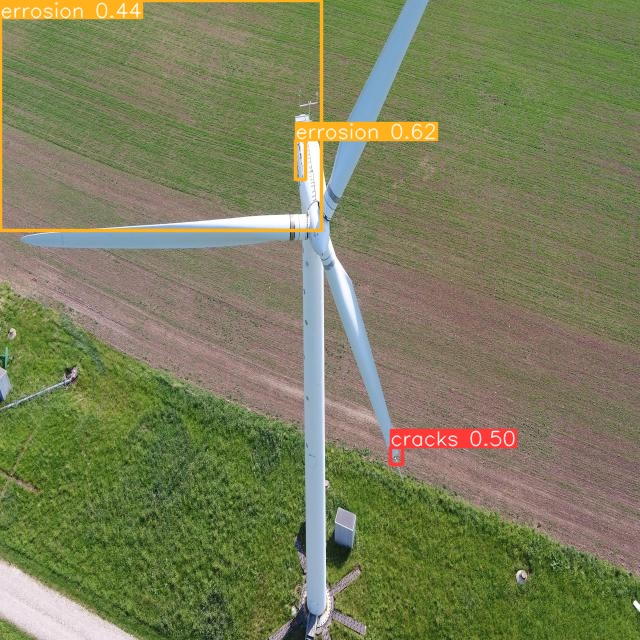

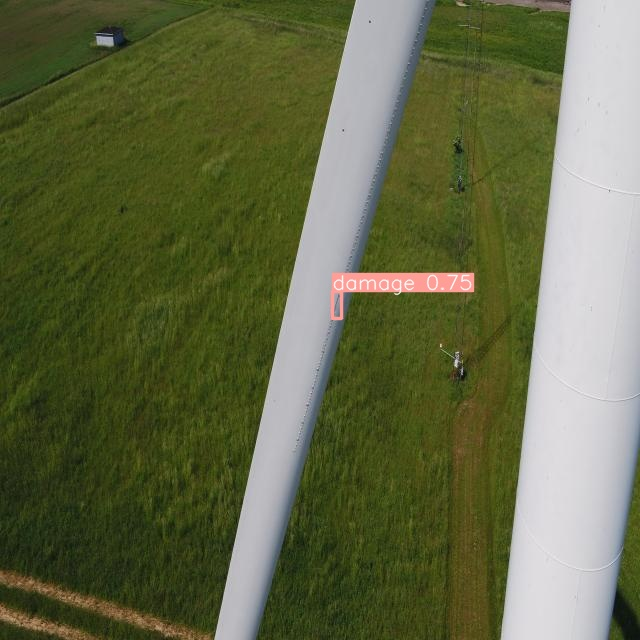

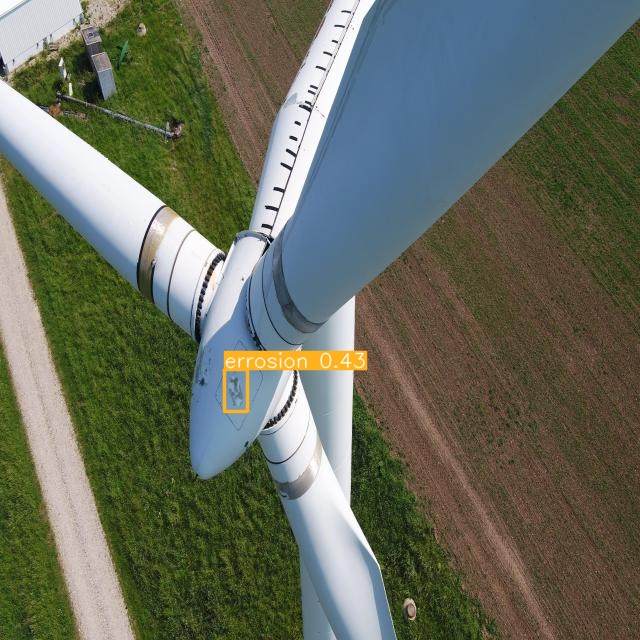

In [28]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")